<a href="https://colab.research.google.com/github/AfrinMahammad/Named-Entity-Recognition/blob/main/Named_Entity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p CONLL2003
!wget -nc -O CONLL2003/train.txt https://github.com/davidsbatista/NER-datasets/raw/dcb6c7439a7de43abc2448bad5b1d81a47f26c0d/CONLL2003/train.txt
!wget -nc -O CONLL2003/valid.txt https://github.com/davidsbatista/NER-datasets/raw/dcb6c7439a7de43abc2448bad5b1d81a47f26c0d/CONLL2003/valid.txt
!pip install nltk
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

--2023-02-19 01:21:50--  https://github.com/davidsbatista/NER-datasets/raw/dcb6c7439a7de43abc2448bad5b1d81a47f26c0d/CONLL2003/train.txt
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/davidsbatista/NER-datasets/dcb6c7439a7de43abc2448bad5b1d81a47f26c0d/CONLL2003/train.txt [following]
--2023-02-19 01:21:51--  https://raw.githubusercontent.com/davidsbatista/NER-datasets/dcb6c7439a7de43abc2448bad5b1d81a47f26c0d/CONLL2003/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3283418 (3.1M) [text/plain]
Saving to: ‘CONLL2003/train.txt’

CONLL2003/train.txt 100%[===================>]   3.13M  --.-K

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
from collections import namedtuple
OneWord=namedtuple("OneWord",["word","pos_label","chunk_label","entity_label"])
def read_conll2003(f_name):
    current_sentence=[] 
    with open(f_name) as f:
        for line in f:
            line=line.strip() 
            if line.startswith("-DOCSTART-"): 
                continue
            if not line: 
                if current_sentence: 
                    yield current_sentence 
                    current_sentence=[] 
                continue
            columns=line.split() 
            assert len(columns)==4 
            current_sentence.append(OneWord(*columns)) 
        else: 
            if current_sentence: 
                yield current_sentence

sentences_train=list(read_conll2003("CONLL2003/train.txt"))
sentences_dev=list(read_conll2003("CONLL2003/valid.txt"))
print("sentences_train",sentences_train[:10])
print("sentences_dev",sentences_dev[:10])
print("First three sentences")
for sent in sentences_dev[:3]:
    print(sent)
    print()

sentences_train [[OneWord(word='EU', pos_label='NNP', chunk_label='B-NP', entity_label='B-ORG'), OneWord(word='rejects', pos_label='VBZ', chunk_label='B-VP', entity_label='O'), OneWord(word='German', pos_label='JJ', chunk_label='B-NP', entity_label='B-MISC'), OneWord(word='call', pos_label='NN', chunk_label='I-NP', entity_label='O'), OneWord(word='to', pos_label='TO', chunk_label='B-VP', entity_label='O'), OneWord(word='boycott', pos_label='VB', chunk_label='I-VP', entity_label='O'), OneWord(word='British', pos_label='JJ', chunk_label='B-NP', entity_label='B-MISC'), OneWord(word='lamb', pos_label='NN', chunk_label='I-NP', entity_label='O'), OneWord(word='.', pos_label='.', chunk_label='O', entity_label='O')], [OneWord(word='Peter', pos_label='NNP', chunk_label='B-NP', entity_label='B-PER'), OneWord(word='Blackburn', pos_label='NNP', chunk_label='I-NP', entity_label='I-PER')], [OneWord(word='BRUSSELS', pos_label='NNP', chunk_label='B-NP', entity_label='B-LOC'), OneWord(word='1996-08-22'

In [ ]:
def generate_sentence_features(sent):
    sent_features=[] 
    for one_word in sent:
        word_features=[]
        word_features=one_word.word 
        sent_features.append(word_features)
    return sent_features

print(generate_sentence_features(sentences_dev[0])  )

['CRICKET', '-', 'LEICESTERSHIRE', 'TAKE', 'OVER', 'AT', 'TOP', 'AFTER', 'INNINGS', 'VICTORY', '.']


In [ ]:
def prep_data(sentences):
    all_labels=[] 
    all_features=[] 
    for sentence in sentences:
        sent_features=generate_sentence_features(sentence)
        assert len(sent_features)==len(sentence)
        for one_word,features in zip(sentence,sent_features):
            all_labels.append(one_word.entity_label) 
            all_features.append(features)        
    return all_labels, all_features

train_labels,train_features=prep_data(sentences_train)
dev_labels,dev_features=prep_data(sentences_dev)

print(dev_features)
print(dev_labels)

['CRICKET', '-', 'LEICESTERSHIRE', 'TAKE', 'OVER', 'AT', 'TOP', 'AFTER', 'INNINGS', 'VICTORY', '.', 'LONDON', '1996-08-30', 'West', 'Indian', 'all-rounder', 'Phil', 'Simmons', 'took', 'four', 'for', '38', 'on', 'Friday', 'as', 'Leicestershire', 'beat', 'Somerset', 'by', 'an', 'innings', 'and', '39', 'runs', 'in', 'two', 'days', 'to', 'take', 'over', 'at', 'the', 'head', 'of', 'the', 'county', 'championship', '.', 'Their', 'stay', 'on', 'top', ',', 'though', ',', 'may', 'be', 'short-lived', 'as', 'title', 'rivals', 'Essex', ',', 'Derbyshire', 'and', 'Surrey', 'all', 'closed', 'in', 'on', 'victory', 'while', 'Kent', 'made', 'up', 'for', 'lost', 'time', 'in', 'their', 'rain-affected', 'match', 'against', 'Nottinghamshire', '.', 'After', 'bowling', 'Somerset', 'out', 'for', '83', 'on', 'the', 'opening', 'morning', 'at', 'Grace', 'Road', ',', 'Leicestershire', 'extended', 'their', 'first', 'innings', 'by', '94', 'runs', 'before', 'being', 'bowled', 'out', 'for', '296', 'with', 'England', 'd

In [ ]:
!wget "https://nlp.stanford.edu/software/stanford-ner-4.2.0.zip"
!unzip "/content/stanford-ner-4.2.0.zip"

--2023-02-19 01:23:46--  https://nlp.stanford.edu/software/stanford-ner-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-ner-4.2.0.zip [following]
--2023-02-19 01:23:47--  https://downloads.cs.stanford.edu/nlp/software/stanford-ner-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180437064 (172M) [application/zip]
Saving to: ‘stanford-ner-4.2.0.zip’

stanford-ner-4.2.0. 100%[===================>] 172.08M  5.11MB/s    in 30s     

2023-02-19 01:24:17 (5.77 MB/s) - ‘stanford-ner-4.2.0.zip’ saved [180437064/180437064]

Archive:  /content/stanford-ner-4.2.0.zip
   creating: stan

In [ ]:
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

st = StanfordNERTagger('/content/stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz',
					   '/content/stanford-ner-2020-11-17/stanford-ner.jar',
					   encoding='utf-8')

classified_text = st.tag(dev_features)

print(classified_text)

[('CRICKET', 'O'), ('-', 'O'), ('LEICESTERSHIRE', 'ORGANIZATION'), ('TAKE', 'O'), ('OVER', 'O'), ('AT', 'O'), ('TOP', 'O'), ('AFTER', 'O'), ('INNINGS', 'O'), ('VICTORY', 'O'), ('.', 'O'), ('LONDON', 'LOCATION'), ('1996-08-30', 'O'), ('West', 'O'), ('Indian', 'O'), ('all-rounder', 'O'), ('Phil', 'PERSON'), ('Simmons', 'PERSON'), ('took', 'O'), ('four', 'O'), ('for', 'O'), ('38', 'O'), ('on', 'O'), ('Friday', 'O'), ('as', 'O'), ('Leicestershire', 'ORGANIZATION'), ('beat', 'O'), ('Somerset', 'LOCATION'), ('by', 'O'), ('an', 'O'), ('innings', 'O'), ('and', 'O'), ('39', 'O'), ('runs', 'O'), ('in', 'O'), ('two', 'O'), ('days', 'O'), ('to', 'O'), ('take', 'O'), ('over', 'O'), ('at', 'O'), ('the', 'O'), ('head', 'O'), ('of', 'O'), ('the', 'O'), ('county', 'O'), ('championship', 'O'), ('.', 'O'), ('Their', 'O'), ('stay', 'O'), ('on', 'O'), ('top', 'O'), (',', 'O'), ('though', 'O'), (',', 'O'), ('may', 'O'), ('be', 'O'), ('short-lived', 'O'), ('as', 'O'), ('title', 'O'), ('rivals', 'O'), ('Essex

In [ ]:
count_loc,count_org,count_per,count_oth=0,0,0,0
for i in range(len(dev_labels)):
  if(dev_labels[i]=="I-LOC" or dev_labels[i]=="B-LOC"):
    dev_labels[i]="LOCATION"
  if(dev_labels[i]=="I-PER" or dev_labels[i]=="B-PER"):
    dev_labels[i]="PERSON"
  if(dev_labels[i]=="I-ORG" or dev_labels[i]=="B-ORG" ):
    dev_labels[i]="ORGANIZATION"
#here i have joined features and labes of dev so that it has similar structure to classified_text
dev_text=list(zip(dev_features,dev_labels))
count=0
for i in range(len(dev_text)):
  if dev_text[i][1]=='LOCATION':
    count_loc+=1
  elif dev_text[i][1]=='PERSON':
    count_per+=1
  elif dev_text[i][1]=='ORGANIZATION':
    count_org+=1
  else:
    count_oth+=1
  if(dev_text[i]==classified_text[i]):
    count+=1  
print("Count :-",count)
print("The accuracy is",count/len(dev_text))    
result = max(set(dev_text), key = dev_text.count)
print ("Recognized most common named entities: " + str(result))

Count :- 49368
The accuracy is 0.9611775242397103
Recognized most common named entities: (',', 'O')


In [ ]:
print(dev_text[:10])

[('CRICKET', 'O'), ('-', 'O'), ('LEICESTERSHIRE', 'ORGANIZATION'), ('TAKE', 'O'), ('OVER', 'O'), ('AT', 'O'), ('TOP', 'O'), ('AFTER', 'O'), ('INNINGS', 'O'), ('VICTORY', 'O')]


In [ ]:
import matplotlib.pyplot as plt

2094 3149 2092


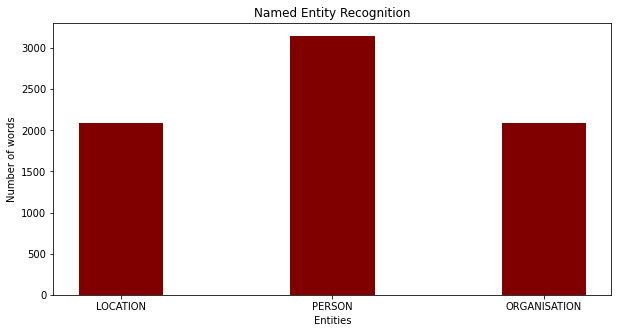

In [ ]:
print(count_loc,count_per,count_org)
labels = ['LOCATION','PERSON','ORGANISATION']
values = [count_loc,count_per,count_org]
fig = plt.figure(figsize = (10, 5))
plt.bar(labels,values,color ='maroon',width = 0.4)
plt.xlabel("Entities")
plt.ylabel("Number of words")
plt.title("Named Entity Recognition")
plt.show()